In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.transforms import BlendedGenericTransform
sns.set()

In [38]:
df = pd.read_pickle("sisec18.pd")

metrics = ['SDR', 'SIR', 'SAR', 'ISR']
targets = ['vocals', 'accompaniment', 'drums', 'bass', 'other']

,time,name,metric,score,track,estimate
0,0.0,drums,SDR,1.99452,Signe Jakobsen - What Have You Done To Me,IBM1
1,1.0,drums,SDR,1.98405,Signe Jakobsen - What Have You Done To Me,IBM1
2,2.0,drums,SDR,0.93426,Signe Jakobsen - What Have You Done To Me,IBM1
3,3.0,drums,SDR,-0.42851,Signe Jakobsen - What Have You Done To Me,IBM1
4,4.0,drums,SDR,-0.41351,Signe Jakobsen - What Have You Done To Me,IBM1
5,5.0,drums,SDR,-0.24998,Signe Jakobsen - What Have You Done To Me,IBM1
6,6.0,drums,SDR,-0.29573,Signe Jakobsen - What Have You Done To Me,IBM1
7,7.0,drums,SDR,-0.34852,Signe Jakobsen - What Have You Done To Me,IBM1
8,8.0,drums,SDR,-0.29476,Signe Jakobsen - What Have You Done To Me,IBM1
9,9.0,drums,SDR,-0.70067,Signe Jakobsen - What Have You Done To Me,IBM1


# Boxplots

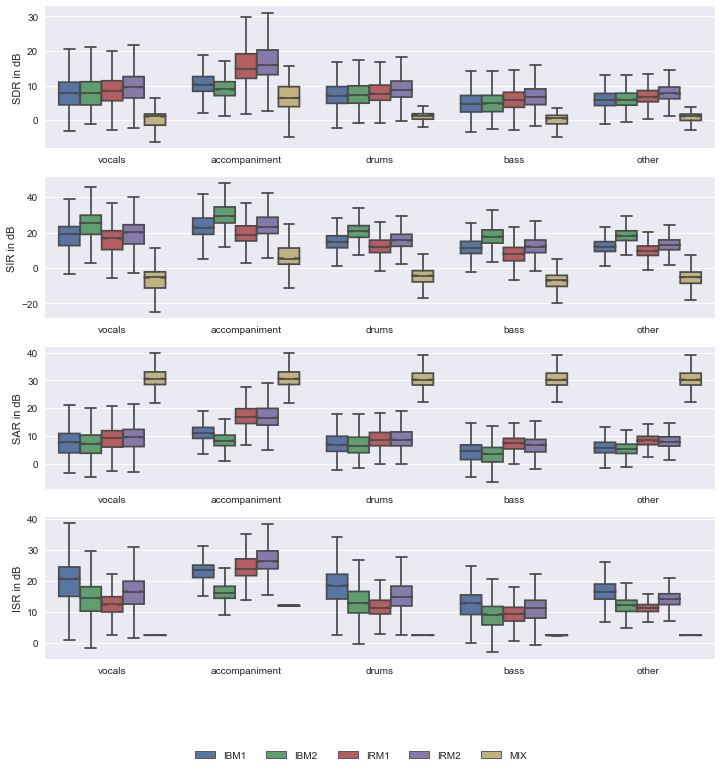

In [29]:
f = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 1)

axes = []
for i, metric in enumerate(metrics):
    ax = plt.subplot(gs[i, 0])
    axes.append(ax)
    df_m = df[df.metric == metric]

    ax = sns.boxplot(
        'name',
        "score",
        "estimate",
        data=df_m,
        showmeans=False,
        notch=True,
        showfliers=False,
        order=targets,
        ax=ax,
    )
    ax.set_ylabel(metric + ' in dB')
    ax.legend_.remove()
    ax.set_xlabel('')

h, leg = ax.get_legend_handles_labels()

plt.figlegend(
    h, leg,
    loc='lower center', ncol=len(targets), labelspacing=0.,
)


# Heatmap for all tracks (SDR)

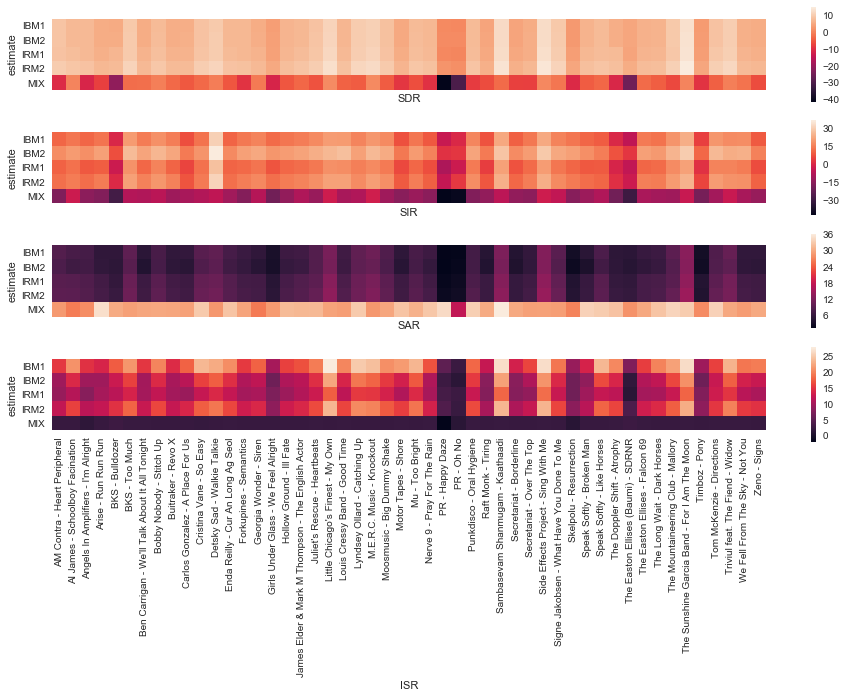

In [69]:
f = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(4, 1)

axes = []
for i, metric in enumerate(metrics):
    df_voc = df[(df.name == 'vocals') & (df.metric == metric)]
    pivoted = pd.pivot_table(df_voc, values='score', index='estimate', columns='track')
    ax = plt.subplot(gs[i, 0])
    axes.append(ax)
    sns.heatmap(pivoted, square=True, ax=ax)
    ax.set_xlabel(metric)


_ = plt.setp(axes[0].get_xticklabels(), visible=False)
_ = plt.setp(axes[1].get_xticklabels(), visible=False)
_ = plt.setp(axes[2].get_xticklabels(), visible=False)


# Trackwise Evaluation (SDR vs. time)

In [82]:
df_track = df[
    (df.track == "Angels In Amplifiers - I'm Alright") & (df.metric == "SDR") & (df.estimate == "IBM1")
]
df_track
# df.plot(df_track.time, df_track.score, logy=True)

,time,name,metric,score,track,estimate
193320,0.0,drums,SDR,12.14096,Angels In Amplifiers - I'm Alright,IBM1
193321,1.0,drums,SDR,4.80066,Angels In Amplifiers - I'm Alright,IBM1
193322,2.0,drums,SDR,0.59787,Angels In Amplifiers - I'm Alright,IBM1
193323,3.0,drums,SDR,5.45600,Angels In Amplifiers - I'm Alright,IBM1
193324,4.0,drums,SDR,10.82010,Angels In Amplifiers - I'm Alright,IBM1
193325,5.0,drums,SDR,6.95892,Angels In Amplifiers - I'm Alright,IBM1
193326,6.0,drums,SDR,6.42753,Angels In Amplifiers - I'm Alright,IBM1
193327,7.0,drums,SDR,7.01489,Angels In Amplifiers - I'm Alright,IBM1
193328,8.0,drums,SDR,7.07868,Angels In Amplifiers - I'm Alright,IBM1
193329,9.0,drums,SDR,6.56389,Angels In Amplifiers - I'm Alright,IBM1
